In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
 
import datetime as dt
import numpy as np

from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import c
from sklearn.linear_model import SGDClassifier
#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [2]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features_train.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivit

180000 rows
360000 rows


In [3]:
#Creating db file from csv
if not os.path.isfile('test.db'):
    disk_engine = create_engine('sqlite:///test.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features_test.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

180000 rows


In [14]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [15]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [16]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [17]:
read_db = 'test.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [18]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data_test = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 50001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [19]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [20]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,1,0.599988000239995,0.599988000239995,0.66664444518516,0.66664444518516,0.624992187597655,0.624992187597655,1.0,1.0,0.0,...,None,None,None,None,None,None,None,None,None,None
2,0,0.0,0.0,0.199996000079998,0.124998437519531,0.0714280612281341,0.0588231833930389,0.0,0.0,3.0,...,None,None,None,None,None,None,None,None,None,None
3,1,0.499987500312492,0.499987500312492,0.999966667777741,0.749981250468738,0.714275510349852,0.624992187597655,0.0,1.0,1.0,...,None,None,None,None,None,None,None,None,None,None
4,0,0.222219753113854,0.105262603881032,0.818174380232907,0.52940865053735,0.43999824000704,0.23404205522967,1.0,1.0,22.0,...,None,None,None,None,None,None,None,None,None,None
5,0,0.66664444518516,0.499987500312492,0.499987500312492,0.499987500312492,0.571420408279882,0.499993750078124,1.0,1.0,1.0,...,None,None,None,None,None,None,None,None,None,None


In [22]:
# remove the first row 
data_test.drop(data_test.index[0], inplace=True)
y_test_true = data_test['is_duplicate']
data_test.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [23]:
data_test.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,1,0.833319444675922,0.416663194473379,0.499987500312492,0.249996875039062,0.699993000069999,0.304346502841292,0.0,1.0,13.0,...,None,None,None,None,None,None,None,None,None,None
2,0,0.999950002499875,0.399992000159997,0.499987500312492,0.399992000159997,0.666655555740738,0.39999600004,0.0,1.0,4.0,...,None,None,None,None,None,None,None,None,None,None
3,1,0.333329629670781,0.29999700003,0.285710204139941,0.285710204139941,0.294115916965194,0.294115916965194,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
4,0,0.749981250468738,0.499991666805553,0.499987500312492,0.333327777870369,0.454541322351615,0.454541322351615,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
5,1,0.66664444518516,0.66664444518516,0.249993750156246,0.249993750156246,0.428565306209911,0.374995312558593,1.0,0.0,1.0,...,None,None,None,None,None,None,None,None,None,None


<h2> 4.2 Converting strings to numerics </h2>

In [25]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = map(int, y_true.values)

In [26]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_test_true = map(int, y_test_true.values)

In [27]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric,errors='coerce')
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [28]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data_test.columns)
for i in cols:
    data_test[i] = data_test[i].apply(pd.to_numeric,errors='coerce')
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

<h2> 4.3 Random train test split( 70:30) </h2>

In [2]:
data_train=pd.read_csv('final_features_train.csv')
data_test=pd.read_csv('final_features_test.csv')
data_train.drop(data_train.index[0], inplace=True)
y_true = data_train['is_duplicate'].values
data_train.drop(['Unnamed: 0_x','Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)
data_test.drop(data_test.index[0], inplace=True)
y_test_true = data_test['is_duplicate'].values
data_test.drop(['Unnamed: 0_x','Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)

In [3]:
#training data got from final_features_test
X_train=data_train[:70000].values
X_test=data_test[:30000].values
y_train=y_true[:70000]
y_test=y_test_true[:30000]

In [4]:
print("Shpae of train data",X_train.shape,y_train.shape)
print("Shape of test data",X_test.shape,y_test.shape)

Shpae of train data (70000, 219) (70000,)
Shape of test data (30000, 219) (30000,)


In [5]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6335571428571428 Class 1:  0.3664428571428571
---------- Distribution of output variable in train data ----------
Class 0:  0.3698666666666667 Class 1:  0.3698666666666667


In [25]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    print("Confusion matrix")
    df_cm = pd.DataFrame(C,range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    print(df_cm)
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    print("Precision matrix")
    df_cm = pd.DataFrame(B,range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    print(df_cm)
    
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    print("Recall matrix")
    df_cm = pd.DataFrame(B,range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    print(df_cm)
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8879982259662449
Confusion matrix
            Predicted NO  Predicted YES
Actual NO           9486           9418
Actual YES          5449           5647
Precision matrix
            Predicted NO  Predicted YES
Actual NO       0.635152       0.625158
Actual YES      0.364848       0.374842
Recall matrix
            Predicted NO  Predicted YES
Actual NO       0.635152       0.625158
Actual YES      0.364848       0.374842


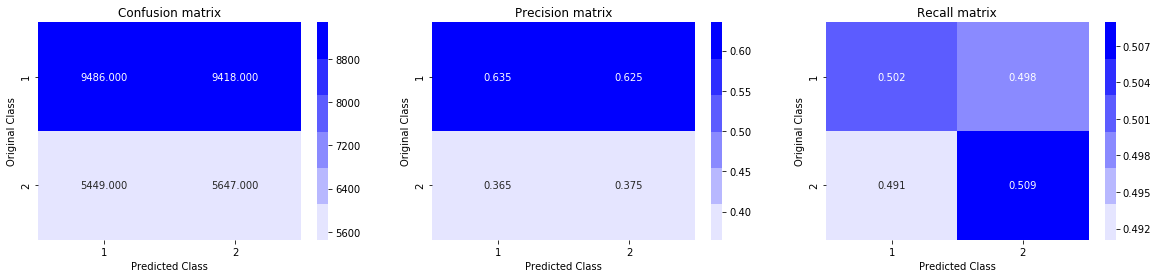

In [124]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-07 The log loss is: 0.5927904576378324
For values of alpha =  1e-06 The log loss is: 0.5909443528510991
For values of alpha =  1e-05 The log loss is: 0.5884413243175798
For values of alpha =  0.0001 The log loss is: 0.5879319408614725
For values of alpha =  0.001 The log loss is: 0.5891032254351823
For values of alpha =  0.01 The log loss is: 0.5901007570784752
For values of alpha =  0.1 The log loss is: 0.628373793051189


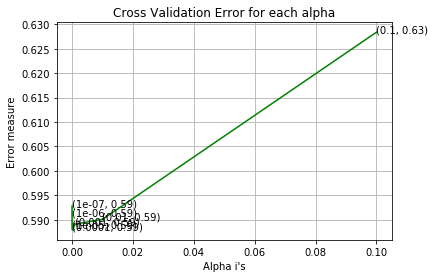

For values of best alpha =  0.0001 The train log loss is: 0.5808928707970528
For values of best alpha =  0.0001 The test log loss is: 0.5908179212138209
Total number of data points : 30000
Confusion matrix
            Predicted NO  Predicted YES
Actual NO          15019           3885
Actual YES          6049           5047
Precision matrix
            Predicted NO  Predicted YES
Actual NO       0.712882       0.434953
Actual YES      0.287118       0.565047
Recall matrix
            Predicted NO  Predicted YES
Actual NO       0.712882       0.434953
Actual YES      0.287118       0.565047


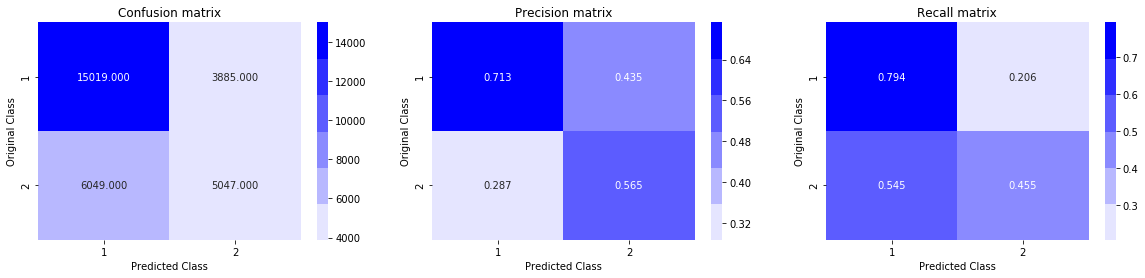

Wall time: 4min 59s


In [138]:
%%time
#warnings.simplefilter("ignore",'FutureWarning')
alpha = [10 ** x for x in range(-7, 7)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log',class_weight='balanced',n_jobs=-1,learning_rate ='adaptive',eta0 =5)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="isotonic",cv=2)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,2)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log',class_weight='balanced',n_jobs=-1,learning_rate='adaptive',eta0 =5)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="isotonic",cv=2)
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5894821727136259
For values of alpha =  0.0001 The log loss is: 0.5891677952937698
For values of alpha =  0.001 The log loss is: 0.5911466047808938
For values of alpha =  0.01 The log loss is: 0.5976186549930591
For values of alpha =  0.1 The log loss is: 0.6248539574278599
For values of alpha =  1 The log loss is: 0.6478512912941948
For values of alpha =  10 The log loss is: 0.6485579315566874


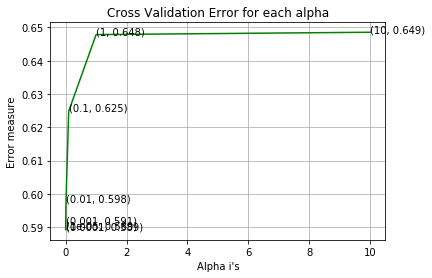

For values of best alpha =  0.0001 The train log loss is: 0.5832719717267644
For values of best alpha =  0.0001 The test log loss is: 0.5931414884160295
Total number of data points : 30000
Confusion matrix
            Predicted NO  Predicted YES
Actual NO          15304           3600
Actual YES          6345           4751
Precision matrix
            Predicted NO  Predicted YES
Actual NO       0.706915       0.431086
Actual YES      0.293085       0.568914
Recall matrix
            Predicted NO  Predicted YES
Actual NO       0.706915       0.431086
Actual YES      0.293085       0.568914


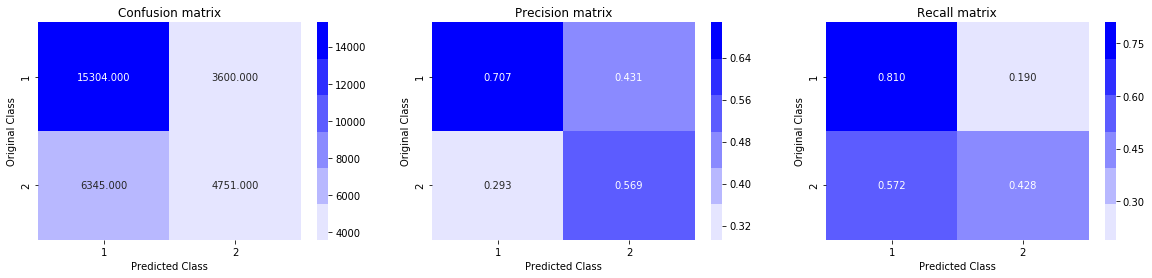

In [142]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------
#alpha=i, penalty='l2', loss='log',class_weight='balanced',n_jobs=-1,learning_rate ='adaptive',eta0 =5

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge',class_weight='balanced',n_jobs=-1,learning_rate ='adaptive',eta0 =5)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="isotonic",cv=2)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge',class_weight='balanced',n_jobs=-1,learning_rate ='adaptive',eta0 =5)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="isotonic",cv=2)
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Assignments </h1>
<h3>1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.

In [6]:
#Reading the 
data_train=pd.read_csv('final_features_train.csv')
data_test=pd.read_csv('final_features_test.csv')
data_train.drop(data_train.index[0], inplace=True)
y_train_tfidf = data_train['is_duplicate']
data_train.drop(['Unnamed: 0_x','Unnamed: 0','is_duplicate'], axis=1, inplace=True)
data_test.drop(data_test.index[0], inplace=True)
y_test_tfidf = data_test['is_duplicate']
data_test.drop(['Unnamed: 0_x','Unnamed: 0','is_duplicate'], axis=1, inplace=True)

In [7]:
#removing the column which not useful from train data set.
data_train.drop(['0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y'], axis=1, inplace=True)
#removing the column which not useful from train data set.
data_test.drop(['0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y'], axis=1, inplace=True)

In [8]:
data_train[:2]

,id,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
1,93043,0.499988,0.499988,0.249994,0.249994,0.374995,0.374995,1.0,1.0,0.0,...,2,46,44,8,7,3.0,15.0,0.2,6,2
2,261901,0.833319,0.714276,0.749981,0.749981,0.799992,0.727266,1.0,1.0,1.0,...,6,59,74,10,10,6.0,20.0,0.3,7,5


In [9]:
data_test[:2]

,id,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
1,344312,0.749981,0.599988,0.666644,0.499988,0.624992,0.624992,0.0,0.0,0.0,...,1,45,53,8,8,4.0,16.0,0.250000,2,0
2,290852,0.999900,0.499975,0.999950,0.999950,0.999967,0.749981,1.0,1.0,1.0,...,1,19,15,4,3,3.0,7.0,0.428571,2,0


In [10]:
#distribution of data set.
y_train_tfidf.value_counts()

0    178654
1    104348
Name: is_duplicate, dtype: int64

In [11]:
y_test_tfidf.value_counts()

0    76371
1    44915
Name: is_duplicate, dtype: int64

<h6> Imbalance dataset.

In [12]:
#Reading nlp_features_train and removing some columns which is already there.
df=pd.read_csv('nlp_features_train.csv',encoding='latin-1')
df.drop(['is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio'],axis=1,inplace=True)
data_train=df.merge(data_train,on='id', how='right')
#data looks like 
#'Unnamed:0',id', 'qid1', 'qid2', 'question1', 'question2', 'index', 'cwc_min',
#'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
#'first_word_eq', 'abs_len_diff', 'mean_len', 'token_set_ratio',
# 'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
# 'longest_substr_ratio', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len',
# 'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share',
# 'freq_q1+q2', 'freq_q1-q2'

In [13]:
data_train.columns

Index(['Unnamed: 0', 'id', 'qid1', 'qid2', 'question1', 'question2', 'cwc_min',
       'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_len_diff', 'mean_len', 'token_set_ratio',
       'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'longest_substr_ratio', 'Unnamed: 0_y', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

In [14]:
#Reading nlp_features_train and removing some columns which is already there.
df_test=pd.read_csv('nlp_features_test.csv',encoding='latin-1')
df_test.drop(['is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio'],axis=1,inplace=True)
data_test=df_test.merge(data_test,on='id', how='right')
#data looks like 
#'Unnamed:0',id', 'qid1', 'qid2', 'question1', 'question2', 'index', 'cwc_min',
#'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
#'first_word_eq', 'abs_len_diff', 'mean_len', 'token_set_ratio',
# 'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
# 'longest_substr_ratio', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len',
# 'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share',
# 'freq_q1+q2', 'freq_q1-q2'

In [15]:
data_test.columns

Index(['Unnamed: 0', 'id', 'qid1', 'qid2', 'question1', 'question2', 'cwc_min',
       'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_len_diff', 'mean_len', 'token_set_ratio',
       'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'longest_substr_ratio', 'Unnamed: 0_y', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_q1 = TfidfVectorizer(min_df=30,max_features=1000)
#Fitting train data and transforming  train ,cv and test vector shape should be same.
tr_q1_tfidf=tfidf_vectorizer_q1.fit_transform(data_train['question1'].values.astype('U'))
te_q1_tfidf=tfidf_vectorizer_q1.transform(data_test['question1'].values.astype('U'))

print("Shape of matrix TFIDF Vectorizer on question1 \nTrain data-{},\nTest data-{}".format(tr_q1_tfidf.shape,te_q1_tfidf.shape))

Shape of matrix TFIDF Vectorizer on question1 
Train data-(283002, 1000),
Test data-(121286, 1000)


In [17]:
tfidf_vectorizer_q2 = TfidfVectorizer(min_df=30,max_features=1000)
#Fitting train data and transforming  train ,cv and test vector shape should be same.
tr_q2_tfidf=tfidf_vectorizer_q2.fit_transform(data_train['question2'].values.astype('U'))
te_q2_tfidf=tfidf_vectorizer_q2.transform(data_test['question2'].values.astype('U'))

print("Shape of matrix TFIDF Vectorizer on question2 \nTrain data-{},\nTest data-{}".format(tr_q2_tfidf.shape,te_q2_tfidf.shape))

Shape of matrix TFIDF Vectorizer on question2 
Train data-(283002, 1000),
Test data-(121286, 1000)


In [18]:
#Removing the the id,qid1,qid2,question1,question2,index once we get TfidfVectorizeration for question1 and question2.
data_train.drop(['Unnamed: 0','id','qid1','qid2','question1','question2'],axis=1,inplace=True)
data_test.drop(['Unnamed: 0','id','qid1','qid2','question1','question2'],axis=1,inplace=True)

In [19]:
#combining all the feature and tfidf features
tr_X_TFIDF=hstack((data_train,tr_q1_tfidf,tr_q2_tfidf))
tr_X_TFIDF=tr_X_TFIDF.toarray()
te_X_TFIDF= hstack((data_test,te_q1_tfidf,te_q2_tfidf))
te_X_TFIDF=te_X_TFIDF.toarray()
print(tr_X_TFIDF.shape)
print(te_X_TFIDF.shape)

(283002, 2027)
(121286, 2027)


<h3>Logistic regression on TFIDF

For values of alpha =  0.01 The log loss is: 0.6125677429101645
For values of alpha =  0.1 The log loss is: 0.6090948565380095
For values of alpha =  1 The log loss is: 0.6028114538603679
For values of alpha =  10 The log loss is: 0.5994850612322475


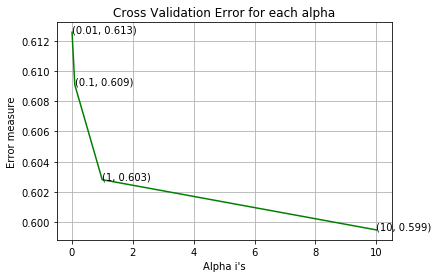

For values of best alpha =  10 The train log loss is: 0.6192971909398267
For values of best alpha =  10 The test log loss is: 0.6224645448213041
Total number of data points : 121286
Confusion matrix
            Predicted NO  Predicted YES
Actual NO          75994            377
Actual YES         44439            476
Precision matrix
            Predicted NO  Predicted YES
Actual NO       0.631006        0.44197
Actual YES      0.368994        0.55803
Recall matrix
            Predicted NO  Predicted YES
Actual NO       0.631006        0.44197
Actual YES      0.368994        0.55803


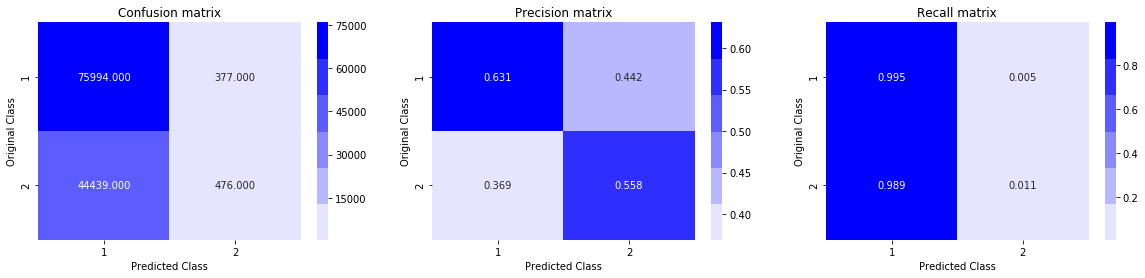

Wall time: 4h 52min 3s


In [27]:
%%time
alpha = [10 ** x for x in range(-2, 2)] # hyperparam for SGD classifier.
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=2,class_weight='balanced',n_jobs=-1)
    clf.fit(tr_X_TFIDF, y_train_tfidf)
    sig_clf = CalibratedClassifierCV(clf, method='isotonic',cv=3)
    sig_clf.fit(tr_X_TFIDF, y_train_tfidf)
    predict_y = sig_clf.predict_proba(tr_X_TFIDF)
    log_error_array.append(log_loss(y_train_tfidf, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_train_tfidf, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=2,class_weight='balanced',n_jobs=-1)
#clf=XGBClassifier( n_estimators=20,objective= 'binary:logistic',seed=27)
clf.fit(tr_X_TFIDF, y_train_tfidf)
sig_clf = CalibratedClassifierCV(clf, method='isotonic',cv=3)
sig_clf.fit(tr_X_TFIDF, y_train_tfidf)

predict_y = sig_clf.predict_proba(tr_X_TFIDF)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tfidf, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(te_X_TFIDF)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tfidf, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tfidf, predicted_y)

<h3>Linear-SVM on TFIDF

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0]

For values of alpha =  0.001 The log loss is: 0.6582699819717955


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0]

For values of alpha =  0.01 The log loss is: 0.6582699819717955


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0]

For values of alpha =  0.1 The log loss is: 0.6582699819717955


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0]

For values of alpha =  1 The log loss is: 0.5947455281018672


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multip

For values of alpha =  10 The log loss is: 0.6420525099642131


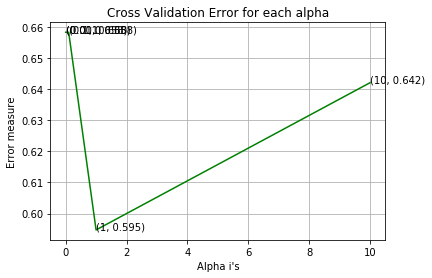

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0]

For values of best alpha =  1 The train log loss is: 0.6122552309000592
For values of best alpha =  1 The test log loss is: 0.6160174504016971
Total number of data points : 121286
Confusion matrix
            Predicted NO  Predicted YES
Actual NO          75833            538
Actual YES         43946            969
Precision matrix
            Predicted NO  Predicted YES
Actual NO       0.633108       0.357001
Actual YES      0.366892       0.642999
Recall matrix
            Predicted NO  Predicted YES
Actual NO       0.633108       0.357001
Actual YES      0.366892       0.642999


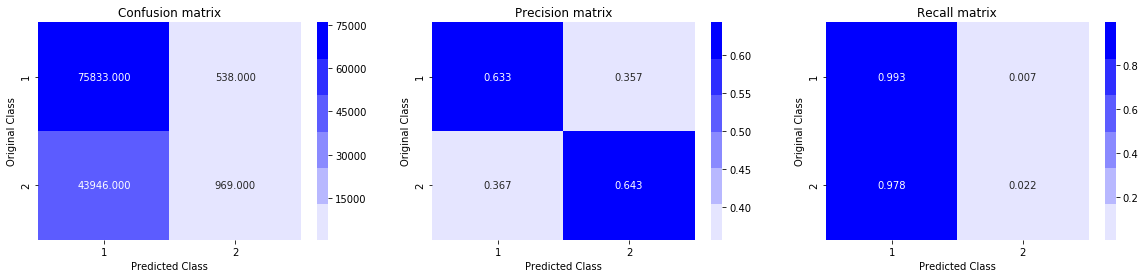

Wall time: 10h 13min 52s


In [28]:
%%time
alpha = [10 ** x for x in range(-3, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(class_weight='balanced',alpha=i, penalty='l1', loss='hinge', random_state=42,n_jobs=-1)
    clf.fit(tr_X_TFIDF, y_train_tfidf)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(tr_X_TFIDF, y_train_tfidf)
    predict_y = sig_clf.predict_proba(tr_X_TFIDF)
    log_error_array.append(log_loss(y_train_tfidf, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_train_tfidf, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42,n_jobs=-1)
clf.fit(tr_X_TFIDF, y_train_tfidf)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(tr_X_TFIDF, y_train_tfidf)

predict_y = sig_clf.predict_proba(tr_X_TFIDF)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tfidf, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(te_X_TFIDF)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tfidf, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tfidf, predicted_y)

<h3>2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss on  TFIDF Weighted W2V.

<h2> 4.6 XGBoost Hyp</h2>

In [70]:
%%time
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
params={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.02] ,
 "max_depth"        : [ 4, 10, 12, 15,30],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.5 , 0.7 ] }
model = XGBClassifier( n_estimators=20,objective= 'binary:logistic',seed=27,n_jobs=-1)
gs=GridSearchCV(estimator=model,cv=3,n_jobs=-1,scoring ='neg_log_loss',verbose=True,param_grid=params,return_train_score=True)
gs.fit(X_train[:20000],y_train[:20000])


Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 62.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 94.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 137.4min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 174.4min finished


Wall time: 2h 54min 45s


In [118]:
results=pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score').head(56)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
966,13.915628,0.111048,0.078003,3.617543e-06,0.7,0.4,0.2,10,5,"{'colsample_bytree': 0.7, 'gamma': 0.4, 'learn...",...,-0.371599,-0.375301,-0.374075,0.001751,1,-0.212022,-0.217916,-0.214602,-0.214847,0.002412
566,14.204998,0.069078,0.097879,3.131560e-03,0.7,0,0.2,10,5,"{'colsample_bytree': 0.7, 'gamma': 0.0, 'learn...",...,-0.370568,-0.377300,-0.374550,0.002883,2,-0.210849,-0.214482,-0.215553,-0.213628,0.002013
666,14.092431,0.175734,0.078005,1.189441e-06,0.7,0.1,0.2,10,5,"{'colsample_bytree': 0.7, 'gamma': 0.1, 'learn...",...,-0.373877,-0.376059,-0.374786,0.000927,3,-0.217456,-0.215283,-0.205893,-0.212877,0.005017
766,13.754334,0.074637,0.093603,2.206180e-02,0.7,0.2,0.2,10,5,"{'colsample_bytree': 0.7, 'gamma': 0.2, 'learn...",...,-0.372139,-0.375334,-0.375041,0.002259,4,-0.213082,-0.221359,-0.215612,-0.216684,0.003463
866,13.915625,0.038212,0.083204,7.353333e-03,0.7,0.3,0.2,10,5,"{'colsample_bytree': 0.7, 'gamma': 0.3, 'learn...",...,-0.372249,-0.374525,-0.375141,0.002649,5,-0.212706,-0.219302,-0.216098,-0.216036,0.002693
765,14.445953,0.066188,0.083201,7.353782e-03,0.7,0.2,0.2,10,3,"{'colsample_bytree': 0.7, 'gamma': 0.2, 'learn...",...,-0.369155,-0.379897,-0.375432,0.004568,6,-0.185955,-0.199226,-0.195076,-0.193419,0.005543
667,13.744025,0.287096,0.083202,7.354850e-03,0.7,0.1,0.2,10,7,"{'colsample_bytree': 0.7, 'gamma': 0.1, 'learn...",...,-0.371871,-0.375577,-0.375556,0.003001,7,-0.227878,-0.229956,-0.229004,-0.228946,0.000849
767,13.468327,0.106820,0.078000,1.949921e-06,0.7,0.2,0.2,10,7,"{'colsample_bytree': 0.7, 'gamma': 0.2, 'learn...",...,-0.371743,-0.378398,-0.375600,0.002818,8,-0.224863,-0.224574,-0.229972,-0.226469,0.002479
267,10.358018,0.028967,0.083679,4.741240e-04,0.5,0.2,0.2,10,7,"{'colsample_bytree': 0.5, 'gamma': 0.2, 'learn...",...,-0.370522,-0.374704,-0.375680,0.004661,9,-0.223514,-0.232053,-0.222062,-0.225876,0.004408
565,14.365220,0.181419,0.081538,2.716102e-03,0.7,0,0.2,10,3,"{'colsample_bytree': 0.7, 'gamma': 0.0, 'learn...",...,-0.372046,-0.375870,-0.375714,0.002934,10,-0.189920,-0.198594,-0.189136,-0.192550,0.004286


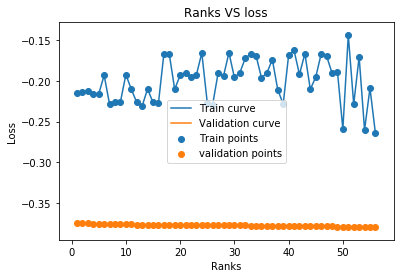

In [123]:
x=[x for x in range(1,57)]
y_train_loss=results.mean_train_score.tolist()
y_test_loss=results.mean_test_score.tolist()
#function to plot lines
#plt.xscale('log')
plt.plot(x,y_train_loss,label="Train curve")
plt.plot(x,y_test_loss,label="Validation curve")
plt.scatter(x, y_train_loss, label='Train points')
plt.scatter(x, y_test_loss, label='validation points')
plt.xlabel("Ranks")
plt.ylabel("Loss")
plt.title("Ranks VS loss")
plt.legend()
plt.show()

<h2>Observation</h2>
1. Model is overfitting once I choose the best parameters {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 5} train-logloss:0.002412	valid-logloss:0.374075 lot of difference between train and validation log loss
2. From the above graph we can observe that at 56th ranked point there is no difference between train and validation loss hence i have selected the paramaters of the 56th ranked datapoint in results dataframe.{'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.15, 'max_depth': 10, 'min_child_weight': 7} .
3. Index of 56th ranked datapoint is 747.




In [120]:
results.params[747]

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.15,
 'max_depth': 10,
 'min_child_weight': 7}

<h2> 4.6 XGBoost </h2>

In [112]:
%%time
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['colsample_bytree']= 0.7
params["gamma"]=0.2
params['max_depth']=10
params['min_child_weight']=7


d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst1 = xgb.train(params, d_train, 
                 , watchlist, early_stopping_rounds=20, verbose_eval=10)
xgdmat1 = xgb.DMatrix(X_train,y_train)
predict_y1 = bst1.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684462	valid-logloss:0.685346
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.599485	valid-logloss:0.613071
[20]	train-logloss:0.537971	valid-logloss:0.561511
[30]	train-logloss:0.491859	valid-logloss:0.523821
[40]	train-logloss:0.454961	valid-logloss:0.494755
[50]	train-logloss:0.426053	valid-logloss:0.472528
[60]	train-logloss:0.402424	valid-logloss:0.455005
[70]	train-logloss:0.383142	valid-logloss:0.441331
[80]	train-logloss:0.367218	valid-logloss:0.430515
[90]	train-logloss:0.353932	valid-logloss:0.421765
[100]	train-logloss:0.342581	valid-logloss:0.414467
[110]	train-logloss:0.332798	valid-logloss:0.408675
[120]	train-logloss:0.324172	valid-logloss:0.403869
[130]	train-logloss:0.316635	valid-logloss:0.399844
[140]	train-logloss:0.309682	valid-logloss:0.396455
[150]	train-logloss:0.303194	valid-logloss:0.393674
[160]	train-logloss:0.297271

Total number of data points : 30000
Confusion matrix
            Predicted NO  Predicted YES
Actual NO          17152           1752
Actual YES          4116           6980
Precision matrix
            Predicted NO  Predicted YES
Actual NO        0.80647       0.200641
Actual YES       0.19353       0.799359
Recall matrix
            Predicted NO  Predicted YES
Actual NO        0.80647       0.200641
Actual YES       0.19353       0.799359


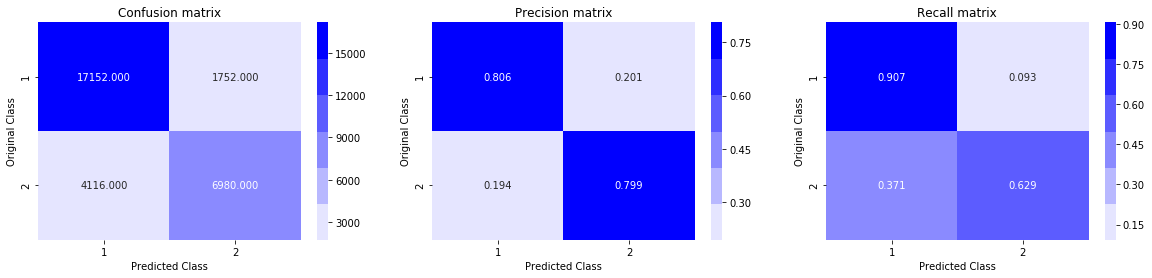

In [113]:
predicted_y1 =np.array(predict_y1>0.5,dtype=int)
print("Total number of data points :", len(predicted_y1))
plot_confusion_matrix(y_test, predicted_y1)

In [146]:
from prettytable import PrettyTable
    
table = PrettyTable()

table.field_names = ["Vectorizer",  "Test loss"]

table.add_row(["Random model","0.89" ])
table.add_row(["logistic regression ","0.59"])
table.add_row(["linear svm","0.59" ])
table.add_row(["logistic regression on TFIDF","0.62"])
table.add_row(["linear svm on TFIDF","0.61" ])
table.add_row(["XG bosst on TFIDF W2V", "0.37" ])


print(table)

+------------------------------+-----------+
|          Vectorizer          | Test loss |
+------------------------------+-----------+
|         Random model         |    0.89   |
|     logistic regression      |    0.59   |
|          linear svm          |    0.59   |
| logistic regression on TFIDF |    0.62   |
|     linear svm on TFIDF      |    0.61   |
|    XG bosst on TFIDF W2V     |    0.37   |
+------------------------------+-----------+
